In [2]:
import requests
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

c:\Users\DELL\VENV\geo\lib\site-packages\geopandas\_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
url = "https://www.mise.gov.it/images/exportCSV/prezzo_alle_8.csv"
df_prezzi = pd.read_csv(url, delimiter=';', skiprows=1)
df_prezzi.head(2)

idImpianto descCarburante  prezzo  isSelf               dtComu
0        6492    Hi-Q Diesel   1.644       1  11/10/2021 17:33:16
1        6612    Hi-Q Diesel   1.669       1  13/10/2021 01:11:44

In [3]:
df_prezzi = df_prezzi.loc[:, ['idImpianto', 'descCarburante', 'prezzo']]
df_prezzi.columns = ['id', 'gasoline_type','price']

In [2]:
url_impianti = "https://www.mise.gov.it/images/exportCSV/anagrafica_impianti_attivi.csv"
df_impianti = pd.read_csv(url_impianti, delimiter=';', skiprows=1)

In [3]:
geo_stations = gpd.GeoDataFrame(
    df_impianti,
    crs='EPSG:4326',
    geometry=gpd.points_from_xy(df_impianti.Longitudine, df_impianti.Latitudine))

In [4]:
# Keeping only usefull columns
geo_stations = geo_stations.loc[:, ['idImpianto', 'Gestore','Bandiera', 'Nome Impianto','Indirizzo', 'Comune', 'geometry']]

## Retriving only valid geometry
geo_stations= geo_stations.loc[geo_stations.geometry.is_valid,:]
geo_stations.rename(columns={'idImpianto': 'id'}, inplace=True)
# geo_stations.to_file('impianti.geojson', driver='GeoJSON')  

In [7]:
# url = 'https://github.com/napo/geospatial_course_unitn/raw/master/data/istat/istat_administrative_units_generalized_2021.gpkg'
# macroregions = gpd.read_file(url,layer="macroregions")
# fix, axes= plt.subplots(1,1, figsize=(20,20))

# plt.title('Italian Station Available')

# macroregions.to_crs(epsg=4326).plot(ax=axes, color='lightblue', edgecolor='black', alpha=0.5)
# geo_stations.plot(ax=axes,
#                     color='royalblue',
#                     markersize= 1.4
#                     )

# plt.axis('off')
# plt.savefig('italian-station.png', dpi=300)
# plt.show()

In [53]:
macroregions.to_file('municipalities.geojson', driver='GeoJSON')

In [1]:
import json
import geopandas as gpd
comune = 'Medolago'
with open(f"./../data/prices_for_municipality/{comune.lower()}.json", 'r') as f:
    result = json.load(f)

In [7]:
gpd.GeoDataFrame(result['Benzina']['3']['price'])

id                                          Gestore       Bandiera  \
0   25733                               LIGURIA GAS S.R.L.  Pompe Bianche   
1   36320                               IP SERVICES S.R.L.         Api-Ip   
2   39057        A.R. SERVICE S.A.S. DI MUHAMMAD AMIR & C.     Oil Italia   
3   36373                BIEFFE SNC DI BIANCHI CHIARA & C.         Api-Ip   
4   30989                        BRIXIA FINANZIARIA S.R.L.      Retitalia   
5   26246                         MANENTI IVAN & C. S.N.C.         Api-Ip   
6   50176  R.C. S.N.C. DI ROSSETTI STEFANO E COFFETTI LUCA           Esso   
7   11431                                    BIFFI DANIELE             Q8   
8   15828           AUTOSERVICE DI GIOVANNI D'ALOIA S.A.S.         Tamoil   
9   38229                                   VAERINI RENATO       Agip Eni   
10  25303                            ROTA STEFANO & C. SNC       Agip Eni   

                                   Nome Impianto  \
0                                    LIGURIA GAS   
1                                       Medolago   
2                                     OIL ITALIA   
3     TotalErg Bieffe snc di Bianchi Chiara & C.   
4               BRIXIA FINANZIARIA SRL - Carvico   
5   Area di servizio IP di Manenti Ivan & C. snc   
6                                Esso Bottanuco    
7                        STAZIONE DI SERVIZIO Q8   
8                                    TAMOIL 4673   
9                                    eni station   
10                                           ENI   

                              Indirizzo           Comune  \
0        VIA GUGLIELMO MARCONI SN 24040           suisio   
1                     via Roma 33 24030         medolago   
2                VIA DONIZZETTI 5 24040  chignolo-disola   
3              via ugo festini  5 23877    paderno-dadda   
4           Via Don Pedrinelli 47 24030          carvico   
5   Via Padre Cesare Albisetti 10 24030     terno-disola   
6                Via industria  6 24040        bottanuco   
7            VIA C.C. GIROLAMO 86 24030          carvico   
8        VIA CESARE BATTISTI 20/A 20872    cornate-dadda   
9               via san rocco 693 24033    calusco-dadda   
10         VIA DON A.PEDRINELLI 1 24030          carvico   

                                             geometry  price  
0   {'type': 'Point', 'coordinates': [9.5156782865...  1.678  
1   {'type': 'Point', 'coordinates': [9.4989768415...  1.699  
2   {'type': 'Point', 'coordinates': [9.5300407578...  1.719  
3   {'type': 'Point', 'coordinates': [9.4458459345...  1.729  
4   {'type': 'Point', 'coordinates': [9.4976109266...  1.729  
5   {'type': 'Point', 'coordinates': [9.5178562402...  1.749  
6   {'type': 'Point', 'coordinates': [9.5093435044...  1.759  
7   {'type': 'Point', 'coordinates': [9.4802056417...  1.759  
8   {'type': 'Point', 'coordinates': [9.4632759690...  1.769  
9   {'type': 'Point', 'coordinates': [9.4785887002...  1.769  
10  {'type': 'Point', 'coordinates': [9.4812719792...  1.779

In [77]:
# url = 'https://github.com/napo/geospatial_course_unitn/raw/master/data/istat/istat_administrative_units_generalized_2021.gpkg'
# macroregions = gpd.read_file(url,layer="municipalities")
# medo = macroregions.loc[macroregions.COMUNE == 'Bergamo']
# area = result['Benzina']['5']['multipolygon']
# prices = result['Benzina']['3']['price']

In [78]:
# from shapely.geometry.multipolygon import MultiPolygon
# from shapely.geometry import Point
# from shapely.geometry import shape
# Multi = MultiPolygon([shape(area)])
# res = []
# for stat in prices[0:5]:
#     stat['geometry'] = Point(shape(stat['geometry']))
#     res.append(stat)

# medo_geo = gpd.GeoDataFrame(res)
# buffer_medo = gpd.GeoDataFrame({'geometry' :Multi})
# medo_geo['color'] =['darkgreen','yellow','red','grey','grey']
# fig, axes = plt.subplots(1,1, figsize=(10,10))


# buffer_medo.plot(ax=axes)
# medo.to_crs(epsg=4326).plot(ax=axes, color='purple')
# medo_geo.plot(ax=axes, color=medo_geo.color, markersize=100)

# plt.show()

In [3]:
url = 'https://github.com/napo/geospatial_course_unitn/raw/master/data/istat/istat_administrative_units_generalized_2021.gpkg'
macroregions = gpd.read_file(url,layer="municipalities")

In [9]:
import unicodedata
def remove_punctuations(text: str) -> str:
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
    return str(text)
names = macroregions.COMUNE.apply(remove_punctuations).values.tolist()

In [10]:
import json
with open('names.json', 'w') as file:
    json.dump(dict(name=names),file)

In [28]:
macroregions.to_crs(epsg=4326).to_file('./../gasoline/src/shared/it_macro_regions.json', driver='GeoJSON')

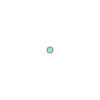

In [35]:
macroregions.geometry.values[0].buffer(10).centroid

id                                           Gestore      Bandiera  \
0      46351                    DI BENEDETTO CARBURANTI S.R.L.  DBCarburanti   
1      23778  ALFONSO DI BENEDETTO CARBURANTI LUBRIFICANTI SRL  Sicilpetroli   
2      49195                 EOS SERVICES S.R.L. A SOCIO UNICO            Q8   
3      49460                 EOS SERVICES S.R.L. A SOCIO UNICO            Q8   
4      49459                 EOS SERVICES S.R.L. A SOCIO UNICO            Q8   
...      ...                                               ...           ...   
21820  44686                                  BROGNA FRANCESCO      Agip Eni   
21821  23438             V.M.G.S. S.A.S. DI FUSCA MICHELE & C.          Esso   
21822  36068        VIBO SERVICE S.N.C. DI PANNACE SILVIO & C.        Api-Ip   
21823  33479                  SERVIZI & GESTIONI ITALIA S.R.L.            Q8   
21824  32424                                IP SERVICES S.R.L.        Api-Ip   

                            Nome Impianto  \
0                               VILLASETA   
1        A. Di Benedetto srl Via Imera Ag   
2                                   AG021   
3                                   AG023   
4                                   AG024   
...                                   ...   
21820            STAZIONE ENI VIBO MARINA   
21821  V.M.G.S.s.a.s. di Fusca Mic. & C.    
21822                        Vibo Service   
21823     VIBO VALENTIA V.LE AFFACCIO, 90   
21824                    ZUNGRI - MAZZINI   

                                               Indirizzo         Comune  \
0                         VILLASETA S.S.115 KM 186,225        AGRIGENTO   
1                                     VIA IMERA 10 92100      AGRIGENTO   
2                                VIA PETRARCA S.N. 92100      AGRIGENTO   
3                         CONTRADA FONTANELLE S.N. 92100      AGRIGENTO   
4                           VILLAGGIO MOSE' S.N.C. 92100      AGRIGENTO   
...                                                  ...            ...   
21820                         VIA SENATORE PARODI  89900  VIBO VALENTIA   
21821                         VIA G. FORTUNATO SNC 89900  VIBO VALENTIA   
21822  Statale 18 Tirrena Inferiore, Km. 441, dir. Re...  VIBO VALENTIA   
21823                             V.LE AFFACCIO 90 89900  VIBO VALENTIA   
21824                                 VIA MAZZINI  88030         ZUNGRI   

                        geometry  
0      POINT (13.56978 37.29332)  
1      POINT (13.58591 37.31239)  
2      POINT (13.58979 37.29823)  
3      POINT (13.59182 37.32612)  
4      POINT (13.61422 37.27432)  
...                          ...  
21820  POINT (16.12638 38.71402)  
21821  POINT (16.12259 38.68641)  
21822  POINT (16.07746 38.66560)  
21823  POINT (16.08758 38.67353)  
21824  POINT (15.98181 38.65412)  

[21818 rows x 7 columns]

In [ ]:
geo_stations.to_file(self.path, driver='GeoJSON')  